# THE SPARKS FOUNDATION #GRIPFEB2021

#### Name: Veena Badgujar

#### TASK1: Prediction using Supervised ML

### Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

### Understanding the DataSet

In [2]:
# Loading the dataset
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Evaluating for Missing Data

In [6]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Visualization

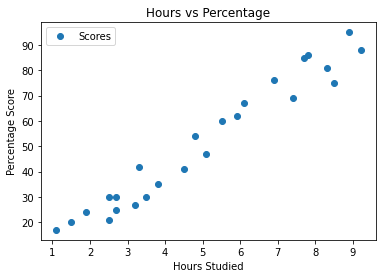

In [8]:
# Plotting the distribution of scores to unserstand the relation between the data.
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


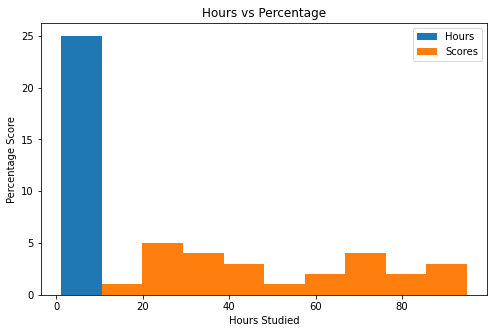

In [9]:
df.plot(kind='hist', figsize=(8, 5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

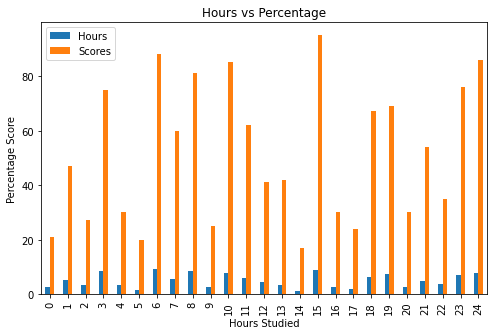

In [10]:
df.plot(kind='bar', figsize=(8, 5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

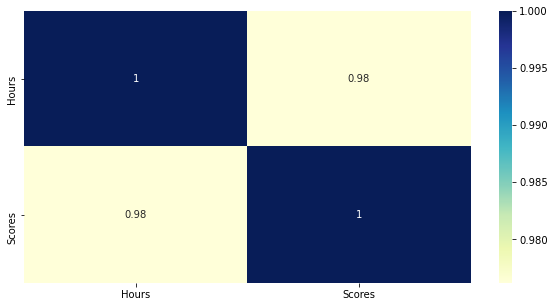

In [11]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Preparing Data for Modelling

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [13]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [14]:
# Building the linear model and train it
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training is complete.')

Training is complete.


In [15]:
# Building the linear model and train it
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training is complete.')

Training is complete.


In [16]:
print("The coefficient is:")
lr.coef_

The coefficient is:


array([9.94167834])

In [17]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*X

C:\Users\atulm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


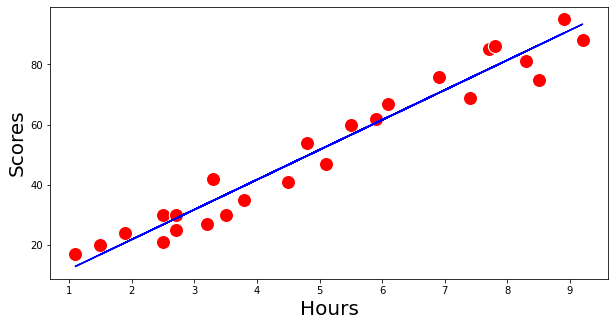

In [18]:
# Plotting the best fitted line on the graph 
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'],s=200,color='r')
plt.plot(df['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()


### Making Prediction

In [19]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [20]:
# Comparing Actual vs Predicted values
datafr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [21]:
# Testting the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 93.89272889341655


### Evaluating the performance of the model

In [22]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


### Conclusion: We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.